$$\require{mhchem}$$       

- Label the x/y axis of graphs (and legend if appropriate)
- Comment your code so we understand what you're doing
- 'print' your identified solutions / fitted constants with units

# Transient, non-isothermal reactor (50 pt)

The liquid phase reactions
\begin{align*}
\ce{A -> B}\\
\ce{A -> C}
\end{align*}
are each first order in the concentration of A. The feed to a nonisothermal transient CSTR contains pure A at 45 $^\circ$C and 5 mol/L. We want to operate this reactor such that the selectivity to B is greater than the selectivity to C. The following parameters apply:

| Parameter       | Value                                    | Units   |
|-----------------|------------------------------------------|---------|
| $M_t$           | 93,200                                   | g/min   |
| $\Delta H_{r1}$ | -12,000                                  | cal/mol |
| $\Delta H_{r2}$ | -15,000                                  | cal/mol |
| V               | 1,000                                    | L       |
| $Q_f$           | 100                                      | L/min   |
| $C_{pf}$        | 0.22                                     | cal/g/K |
| $k_1$           | $3.16 \times 10^{14}\exp (-12,500 [K]/T)$ | 1/min   |
| $k_2$           | $2.52 \times 10^{9}\exp (-8,500 [K]/T)$  | 1/min   |

The CSTR has a cooling bath at 50 $^{\circ}$C and a $Ua$ of 100,000 cal/min/K.  The reactor initially starts at 45 $^{\circ}$C and C$_a$=C$_b$=C$_c$=0 M. The total mass in the reactor is $V M_t / Q_f$.

#### If you want to increase selectivity in the reactor ($C_B/C_C$), should you increase or decrease the temperature in the reactor? (5 pt)

Reaction 1 has a more negative exponential Arrhenius constant (-12,500 K vs. -8,500 K),
which means that the rate constant for reaction 1 is more sensitive to temperature
than the rate constant for reaction 2. As such, increases in temperature
should increase the rate of reaction 1 faster than it increases the rate of reaction 2,
thereby improving selectivity.

So we should increase temperature to increase selectivity.

#### Calculate the  transient temperature and concentrations in this reactor.  You may assume the heats of reactions are constant w.r.t to temperature ( since Cpa=Cpb=Cpc, dCp=0) for the first 40 minutes. (30 pt)

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# Constants 
Ca_in = 5.  # mol/L
Cb_in = 0.  # mol/L
Cc_in = 0.  # mol/L
M_t = 93200.  # g/min
dH = np.array([-12000, -15000])  # cal/mol
V = 1000.  # L
Qf = 100.  # L/min
Cp = 0.22  # cal/g-K
T_in = 45+273.15  # K
T_0 = 45+273.15  # K
T_bath = 50+273.15  # K
Ua = 100000.  # cal/min-K
C0 = 0.  # mol/L
# Calculable constants... and whatnot
M = V*M_t/Qf  # g
tau = V/Qf  # min


def calc_k(T):
    ''' Calculate the rate constants as a function of temperature '''
    k1 = 3.16e14 * np.exp(-12500./T)
    k2 = 2.52e9 * np.exp(-8500./T)
    k = np.array([k1, k2])
    return k  # 1/min


def dXdt(X, t, T_bath):
    ''' Calculate the differential equations for concentrations and temperature '''
    Ca, Cb, Cc, T = X
    k = calc_k(T)
    r = k*Ca  # mol/L-min
    
    dT_rxn = -sum(dH*r*V)/(M*Cp)
    dT_feed = (T_in-T)/tau
    dT_jacket = Ua*(T_bath-T)/(M*Cp)
    dTdt = dT_rxn + dT_feed + dT_jacket
    
    dCadt = -sum(r) + Qf*(Ca_in-Ca)/V
    dCbdt = r[0] + Qf*(Cb_in-Cb)/V
    dCcdt = r[1] + Qf*(Cc_in-Cc)/V
    
    return [dCadt, dCbdt, dCcdt, dTdt]


t = np.linspace(0, 40, 100)  # min
X0 = [C0, C0, C0, T_0]
X_t = odeint(dXdt, X0, t, args=(T_bath,))
Ca_t = X_t[:, 0]
Cb_t = X_t[:, 1]
Cc_t = X_t[:, 2]
T_t = X_t[:, 3]

# Plot concentrations
plt.plot(t, Ca_t, t, Cb_t, t, Cc_t)
plt.xlabel('Time [min]')
plt.ylabel('Concentration [mol/L]')
plt.legend(['A', 'B', 'C'])
plt.show()
# Plot Temperature
plt.plot(t, T_t)
plt.xlabel('Time [min]')
plt.ylabel('Temperature [K]]')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

#### Calculate the cumulative selectivity of this reactor at 40 min, defined as $C_B/C_C$, as a function of the bath temperature, from 30 $^{\circ}$C to 60 $^{\circ}$C. (10 pt)

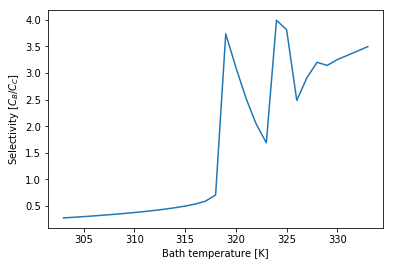

In [3]:
T_range = range(30+273, 61+273)  # C
S = []
for T in T_range:
    X_t = odeint(dXdt, X0, t, args=(T,))
    Cb = X_t[-1, 1]
    Cc = X_t[-1, 2]
    S.append(Cb/Cc)

plt.plot(T_range, S)
plt.xlabel('Bath temperature [K]')
plt.ylabel('Selectivity [$C_B/C_C$]')
plt.show()

#### Describe the profile and selectivity plots you made (a few sentences or bullets). Discuss any abnormalities you may see and why they appear. [5 pt]

Answer varies